<a href="https://colab.research.google.com/github/Pranit07G/PG-AlmaBetter-EDA-AirBNB-NYC/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/EDA/Airbnb/Airbnb NYC 2019.csv'

bnb_nyc = pd.read_csv(path)

In [98]:
bnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [99]:
bnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [100]:
bnb_nyc.describe(include=['object','category'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [101]:
# Get an overview of the contents of each column.
bnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [102]:
# Check the no of null values in each column
bnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [103]:
# Replace null values in last_review column by NaN 
bnb_nyc["last_review"].fillna('NaN', inplace = True)
# Replace null values in reviews_per_month by 0 
bnb_nyc["reviews_per_month"].fillna(0, inplace = True)

In [104]:
bnb_nyc.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [105]:
#id is the unique identifier for the data
bnb_nyc["id"].nunique()

48895

In [106]:
bnb_nyc.nunique(axis = 0)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

It can be seen that the 'id' column can be considered as a unique identifier for all the rows. Also, 'host_id' uniquely identifies the hosts while the 'host_name' contains duplicate value and even null values. Hence, we can drop the column 'name' and 'host_name' from the above dataset to clean the data. 

In [108]:
bnb_nyc.drop(["name","host_name"], axis = 1, inplace = True)


In [109]:
bnb_nyc

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [41]:
categorical_features = list(top_100.describe(include=['object','category']).columns)
categorical_features.remove("host_name_x")
categorical_features.remove("last_review")
categorical_features.remove("name")
categorical_features.remove("host_name_y")
categorical_features

['neighbourhood_group', 'neighbourhood', 'room_type']

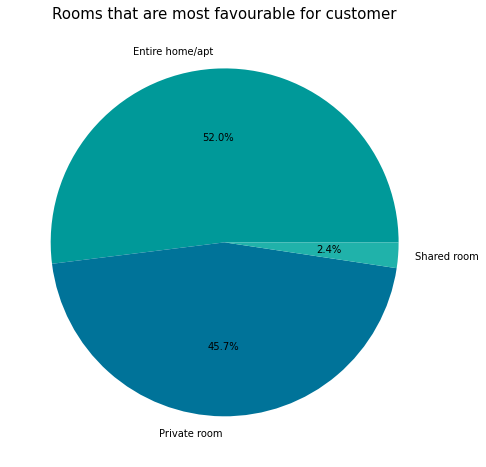

In [110]:
#The rooms that customers choose the most
labels = bnb_nyc['room_type'].value_counts().index
sizes = bnb_nyc['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Rooms that are most favourable for customer", color = 'black',fontsize = 15);

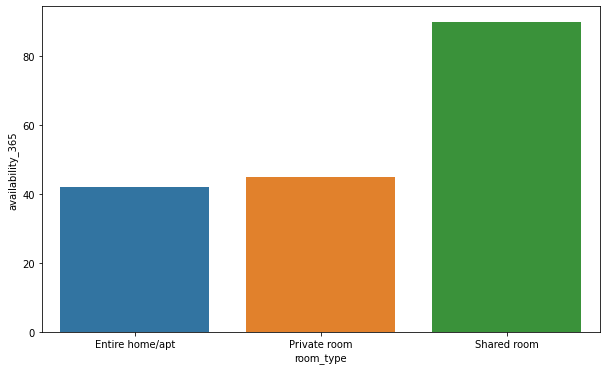

In [111]:
#Availability as per room type
room_type_mean_price = bnb_nyc.groupby("room_type")["availability_365"].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price["room_type"], y=room_type_mean_price["availability_365"], palette='tab10');

It can be seen from the above bar chart that the shared rooms have the highest availabily as compared to Entire Home/ Apt or a Private Room. This re-inforces the earlier findings about the Entire Home/ Apt or a Private Room being the most popular booking choice.

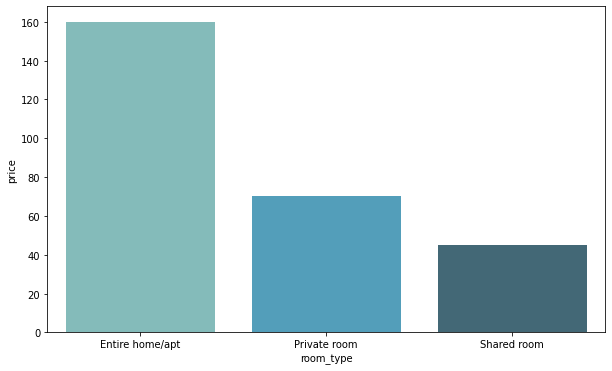

In [112]:
#Median price for room type
room_type_mean_price = bnb_nyc.groupby('room_type')['price'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price['room_type'], y=room_type_mean_price['price'], palette='GnBu_d');

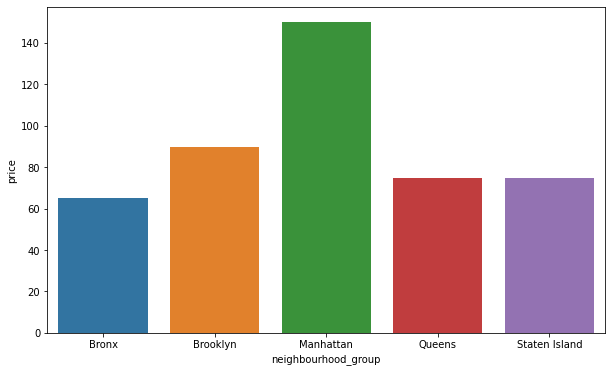

In [113]:
#Median price for Neighbourhood Group type
room_type_mean_price = bnb_nyc.groupby("neighbourhood_group")["price"].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price["neighbourhood_group"], y=room_type_mean_price["price"], palette='tab10');

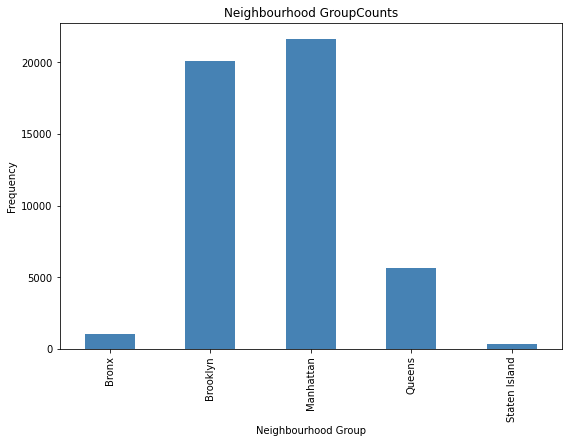

In [114]:
# Neighbourhood groups with the most number of Rooms

counts = bnb_nyc["neighbourhood_group"].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Neighbourhood Group" + 'Counts')
ax.set_xlabel("Neighbourhood Group") 
ax.set_ylabel("Frequency")
plt.show()



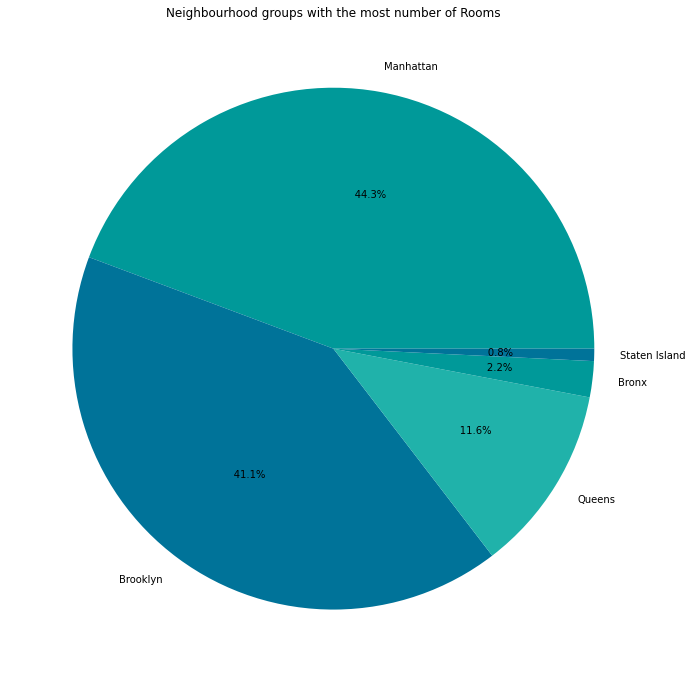

In [115]:
#Neighbourhood groups with the most number of Rooms
labels = bnb_nyc["neighbourhood_group"].value_counts().index
sizes = bnb_nyc["neighbourhood_group"].value_counts().values
plt.figure(figsize = (12,12))
plt.pie(sizes, labels=labels, autopct='%10.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Neighbourhood groups with the most number of Rooms", color = 'black',fontsize = 12);

In [116]:
# Top 25 hosts with the most number of listings

top_25_hosts= bnb_nyc.groupby(["host_id"])["id"].count().sort_values(ascending = False).reset_index().head(25)
top_25_hosts

,host_id,id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [117]:
# Create a Dataframe consisting of details of top 25 hosts with the most number of listings

top_25_hosts_by_listings = pd.merge(bnb_nyc,top_25_hosts, on='host_id', how='inner')

top_25_hosts_by_listings

,id_x,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,id_y
0,613556,1475015,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116,52
1,652371,1475015,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358,52
2,652466,1475015,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342,52
3,652515,1475015,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223,52
4,652648,1475015,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,33830665,238321374,Manhattan,Upper West Side,40.79863,-73.96103,Private room,60,30,0,NaN,0.00,32,348,32
1862,33831016,238321374,Manhattan,Upper West Side,40.80035,-73.96106,Private room,60,30,0,NaN,0.00,32,250,32
1863,33831074,238321374,Manhattan,Upper West Side,40.79995,-73.96139,Private room,60,30,0,NaN,0.00,32,83,32
1864,33831138,238321374,Manhattan,Upper West Side,40.80006,-73.96095,Private room,60,30,0,NaN,0.00,32,37,32


In [118]:
top_25_hosts_by_listings.describe(include=['object','category'])

,neighbourhood_group,neighbourhood,room_type,last_review
count,1866,1866,1866,1866
unique,4,48,3,391
top,Manhattan,Financial District,Entire home/apt,NaN
freq,1593,323,1542,885


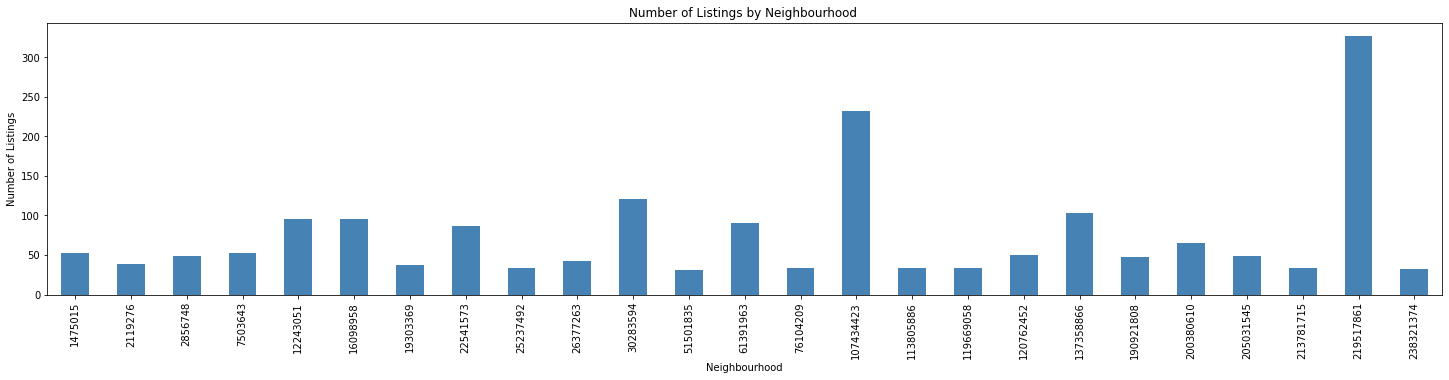

In [121]:
# Bar plot of count of AirBnB listings of top 100 hosts(by number of listings) distributed across the Neighbourhood 

counts = top_25_hosts_by_listings["host_id"].value_counts().sort_index()
fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Number of Listings by Neighbourhood ")
ax.set_xlabel("Neighbourhood") 
ax.set_ylabel("Number of Listings")
plt.show()

In [122]:
top_25_hosts_by_listings["neighbourhood_group"].value_counts().sort_index()

Bronx           1
Brooklyn      155
Manhattan    1593
Queens        117
Name: neighbourhood_group, dtype: int64

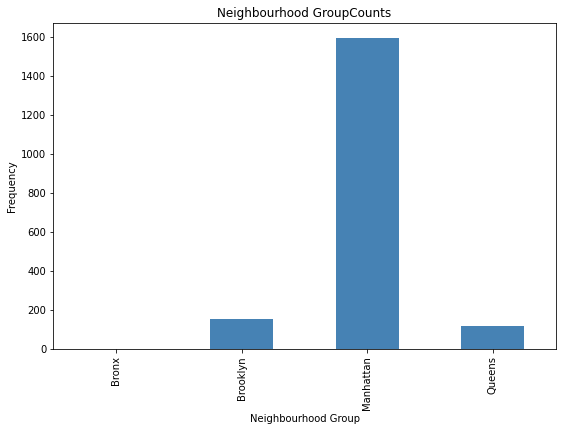

In [123]:
# Bar plot of count of AirBnB listings of top 100 hosts(by number of listings) distributed across the Neighbourhood Group 

counts = top_25_hosts_by_listings["neighbourhood_group"].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Neighbourhood Group" + 'Counts')
ax.set_xlabel("Neighbourhood Group") 
ax.set_ylabel("Frequency")
plt.show()

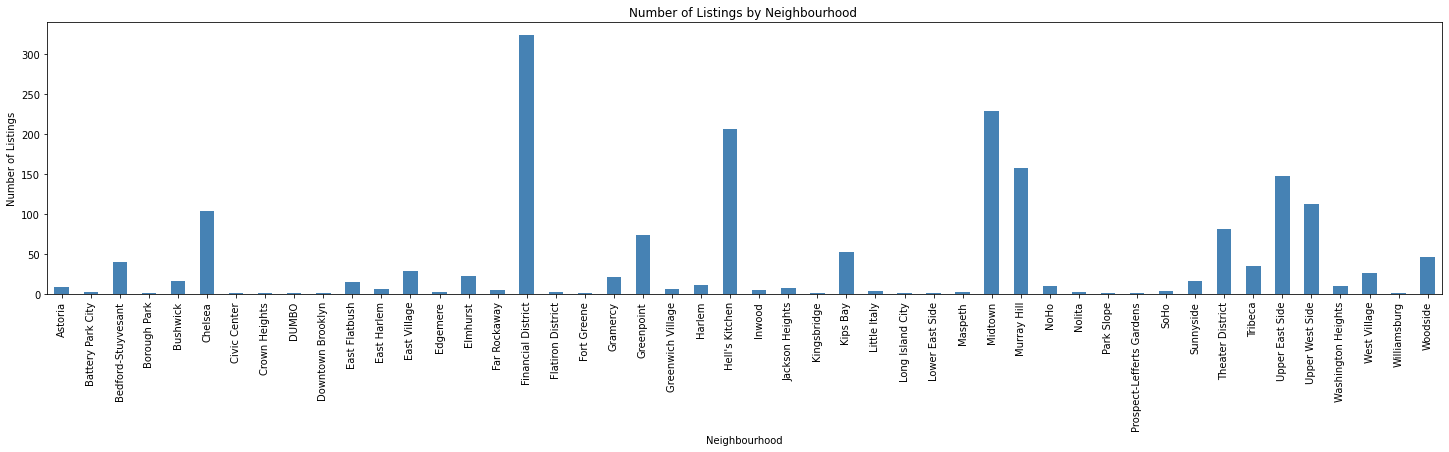

In [125]:
# Bar plot of count of AirBnB listings of top 100 hosts(by number of listings) distributed across the Neighbourhood 

counts = top_25_hosts_by_listings["neighbourhood"].value_counts().sort_index()
fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Number of Listings by Neighbourhood ")
ax.set_xlabel("Neighbourhood") 
ax.set_ylabel("Number of Listings")
plt.show()

In [23]:
bnb_nyc.sort_values(["number_of_reviews"], ascending = False).head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [135]:
bnb_10_reviews = bnb_nyc[bnb_nyc["number_of_reviews"] > 10]
bnb_10_reviews

In [136]:
bnb_10_reviews

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46260,35167554,264854526,Queens,East Elmhurst,40.75829,-73.88013,Private room,55,1,12,2019-07-01,9.73,1,0
46354,35220162,246272839,Queens,Flushing,40.76500,-73.81875,Entire home/apt,96,1,12,2019-07-03,10.91,4,159
46428,35247268,265271198,Manhattan,Hell's Kitchen,40.76495,-73.98784,Entire home/apt,330,1,13,2019-07-04,10.54,1,164
46891,35480817,266828681,Manhattan,Hell's Kitchen,40.75493,-73.99458,Entire home/apt,320,1,12,2019-07-02,12.00,1,189


In [127]:
(bnb_nyc[bnb_nyc["number_of_reviews"] > 200]).groupby(["neighbourhood","number_of_reviews"])["price"].median().sort_values().reset_index()

,neighbourhood,number_of_reviews,price
0,Woodhaven,386,29.0
1,Mount Eden,291,30.0
2,East Elmhurst,411,32.0
3,East Elmhurst,333,33.0
4,Arverne,201,35.0
...,...,...,...
564,West Village,237,350.0
565,Hell's Kitchen,287,399.0
566,Financial District,285,420.0
567,Williamsburg,250,500.0


In [25]:
bnb_nyc.groupby(["id","neighbourhood_group"])["neighbourhood_group"].count()

id        neighbourhood_group
2539      Brooklyn               1
2595      Manhattan              1
3647      Manhattan              1
3831      Brooklyn               1
5022      Manhattan              1
                                ..
36484665  Brooklyn               1
36485057  Brooklyn               1
36485431  Manhattan              1
36485609  Manhattan              1
36487245  Manhattan              1
Name: neighbourhood_group, Length: 48895, dtype: int64

In [26]:
bnb_nyc["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

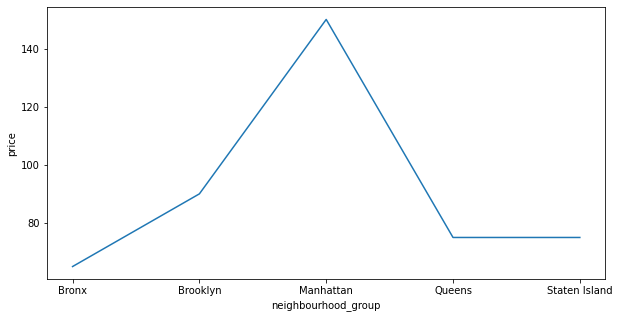

In [27]:
ng_price = bnb_nyc.groupby("neighbourhood_group")["price"].median()
plt.figure(figsize=(10, 5))

sns.lineplot(data = ng_price)

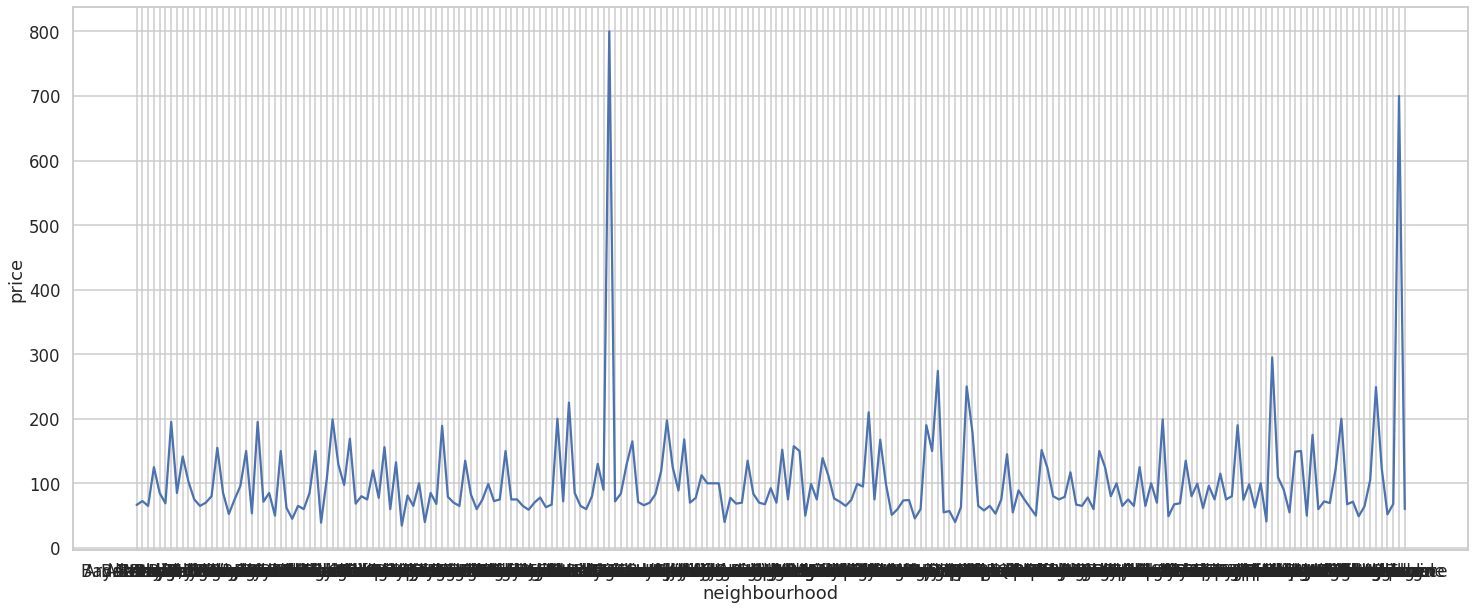

In [19]:
sns.set_theme(style="whitegrid", context="talk")
neighbourhood_price = bnb_nyc.groupby("neighbourhood")["price"].median()
neighbourhood_price.columns = ["Neighbourhood", "Price"]
plt.figure(figsize=(25, 10))
neighbourhood_price
sns.lineplot(data = neighbourhood_price)

In [11]:
bnb_nyc.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [12]:
bnb_nyc.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [13]:
bnb_nyc.groupby(["neighbourhood_group","room_type"])["price"].median().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


In [14]:
bnb_nyc.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [15]:
bnb_nyc.groupby(["host_id","host_name"])["calculated_host_listings_count"].value_counts().sort_values(ascending = False)

host_id    host_name       calculated_host_listings_count
219517861  Sonder (NYC)    327                               327
107434423  Blueground      232                               232
30283594   Kara            121                               121
137358866  Kazuya          103                               103
16098958   Jeremy & Laura  96                                 96
                                                            ... 
13543967   Paulina         1                                   1
13541655   Michael         1                                   1
13540183   Ashley          1                                   1
13538150   Mariana         1                                   1
274321313  Kat             1                                   1
Name: calculated_host_listings_count, Length: 37439, dtype: int64

In [16]:
bnb_nyc.groupby(["host_id","host_name"])["name"].value_counts().sort_values(ascending = False)

host_id    host_name            name                                              
134184451  Hillside Hotel       Hillside Hotel                                        18
417504     The Box House Hotel  Loft Suite @ The Box House Hotel                      11
230192510  Zach                 Artsy Private BR in Fort Greene Cumberland            10
76104209   Rated                IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
27636707   Gaia&Pietro          WEST VILLAGE Bohemian flat in neo-Tudor town house     5
                                                                                      ..
13347167   AFI Apartments       Cute Apartment with Great Bathroom!                    1
                                Exquisite Furnished 1-BR Studio                        1
                                Fabulous Apartment with Soaking Tub                    1
                                Fabulous Apt w/ Gorgeous Bathroom!                     1
274321313  Kat             

In [30]:
bnb_nyc.groupby("neighbourhood_group")["host_id"].value_counts()

neighbourhood_group  host_id  
Bronx                310670       13
                     23878336     10
                     30509656      8
                     35783912      8
                     295128        7
                                  ..
Staten Island        258635350     1
                     268430876     1
                     269592097     1
                     271528362     1
                     272557707     1
Name: host_id, Length: 37572, dtype: int64

In [40]:
bnb_nyc.groupby(["neighbourhood_group","host_id"])["host_id"].count()

neighbourhood_group  host_id  
Bronx                12221        2
                     42761        1
                     119445       1
                     120623       1
                     153817       1
                                 ..
Staten Island        258635350    1
                     268430876    1
                     269592097    1
                     271528362    1
                     272557707    1
Name: host_id, Length: 37572, dtype: int64

In [43]:
bnb_nyc.groupby(["host_id","neighbourhood_group"])["neighbourhood_group"].count().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_id,,,,,
2438,NaN,1.0,NaN,NaN,NaN
2571,NaN,1.0,NaN,NaN,NaN
2787,NaN,6.0,NaN,NaN,NaN
2845,NaN,NaN,2.0,NaN,NaN
2868,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...
274273284,NaN,NaN,1.0,NaN,NaN
274298453,NaN,1.0,NaN,NaN,NaN
274307600,NaN,1.0,NaN,NaN,NaN
